# Candle Chart

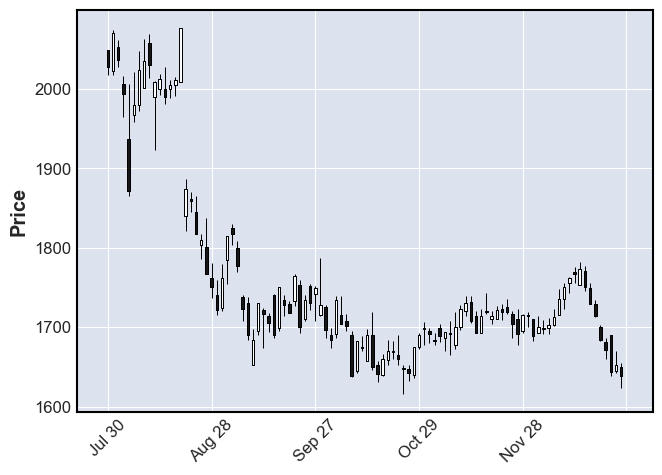

In [18]:
import pandas as pd
import pandas_datareader.data as pdr
import mplfinance as mpf
import datetime as dt

def get_stock_data(name):
    df = pdr.DataReader(name, "stooq").sort_index()
    return df
    
name = "7616.jp"
#name = "AAPL.US"
df = get_stock_data(name)
df.tail()

# Candlestick chart
cdf = df.tail(100)
mpf.plot(cdf, type="candle")


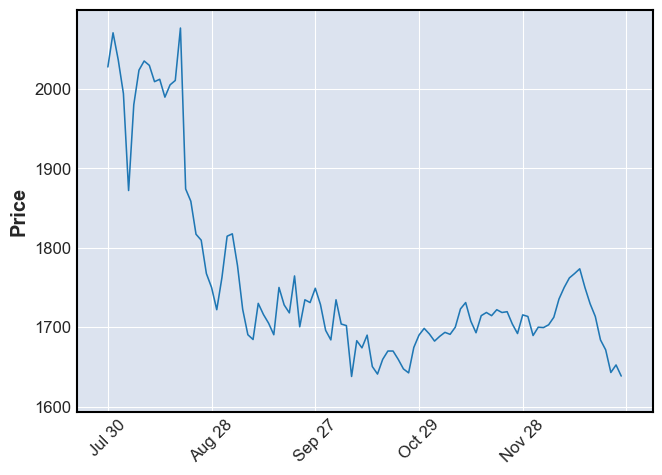

In [ ]:
# Line chart over closes
mpf.plot(cdf, type="line")

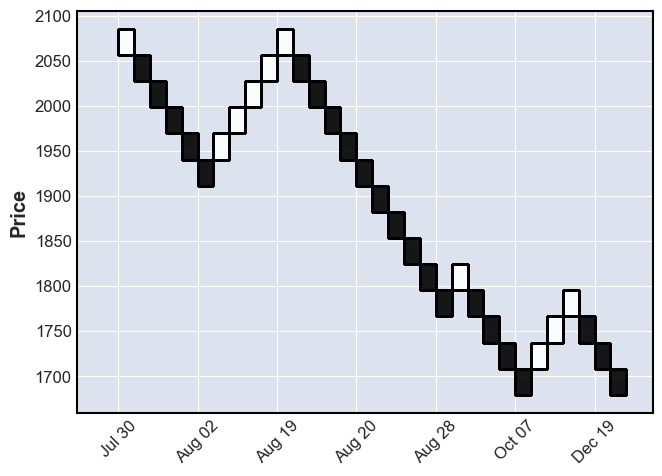

In [14]:
# renko
mpf.plot(cdf, type="renko")

In [37]:
# point and figure
#mpf.plot(cdf, type="pnf")

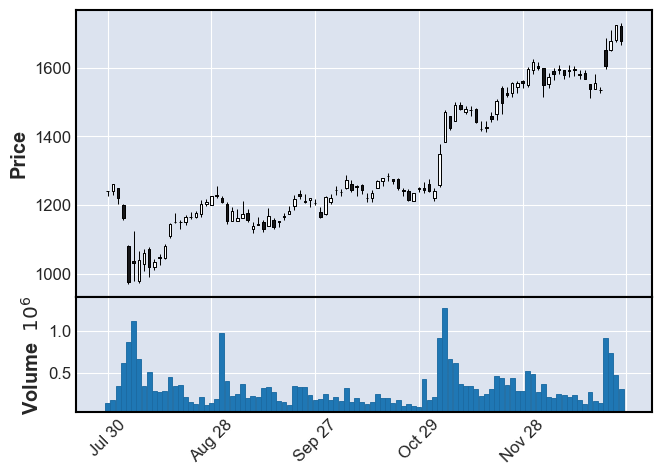

In [19]:
# Candlestick chart with volume
name = "2395.jp"
df = get_stock_data(name)
cdf = df.tail(100)
mpf.plot(cdf, type="candle", volume=True)

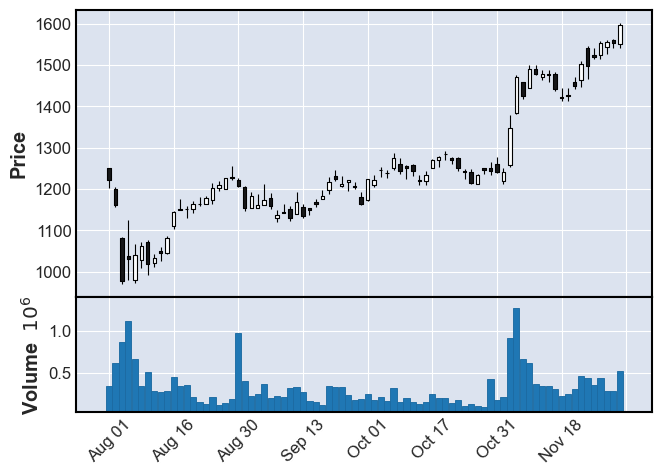

In [25]:
# Candlestick chart with volume with range
df_range = df[dt.date(2024, 8, 1):dt.date(2024, 11,30)]
mpf.plot(df_range, type="candle", volume=True)

In [24]:
mpf.available_styles()

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']

binance


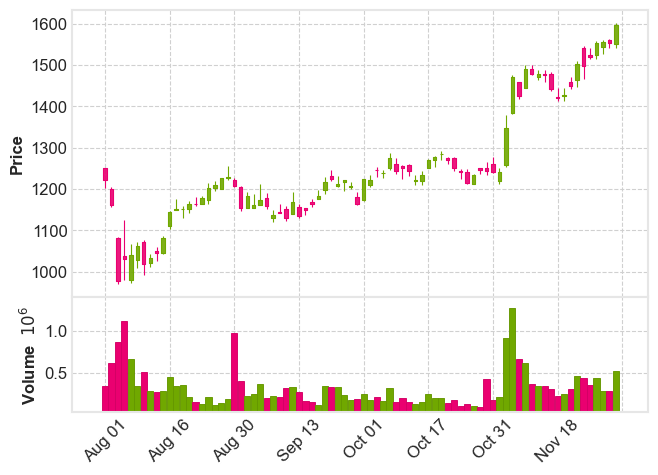

binancedark


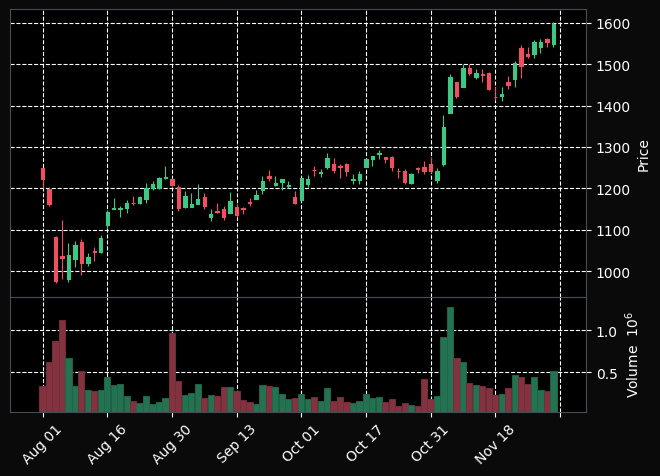

blueskies


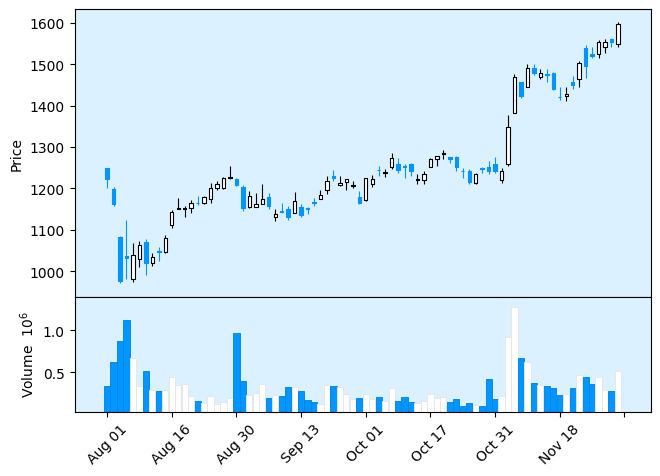

brasil


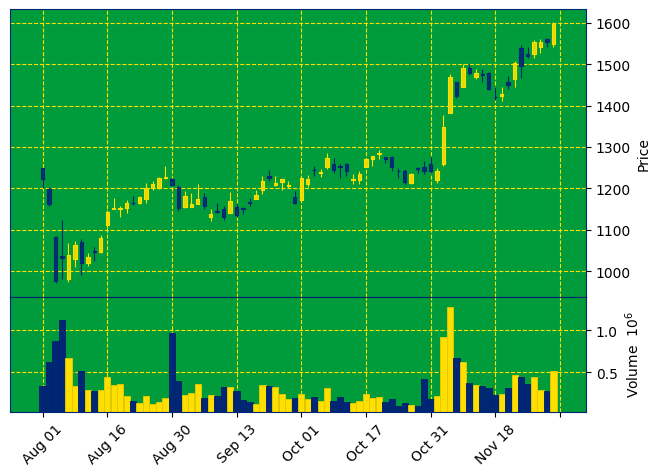

charles


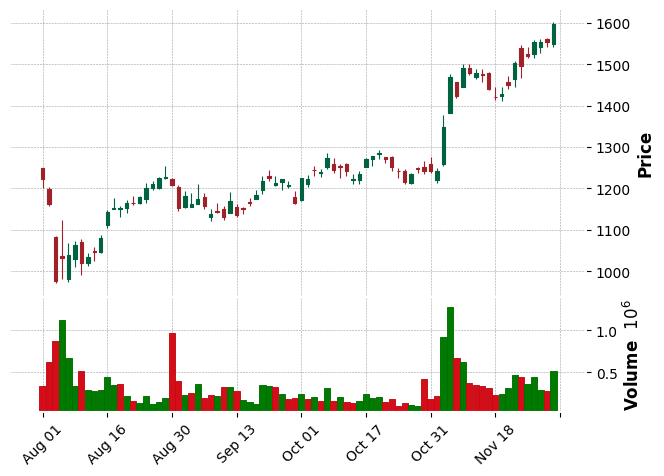

checkers


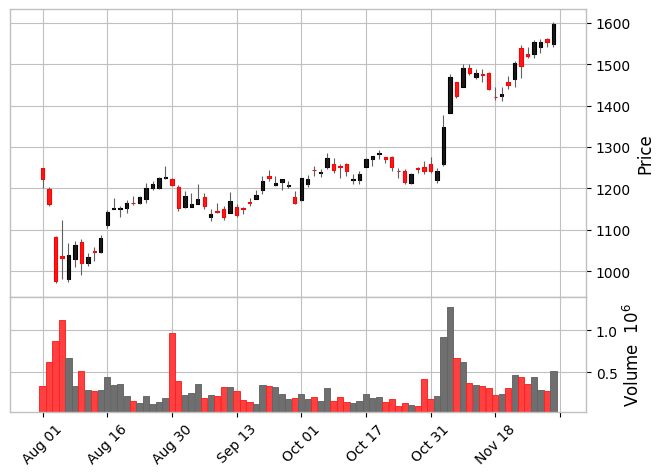

classic


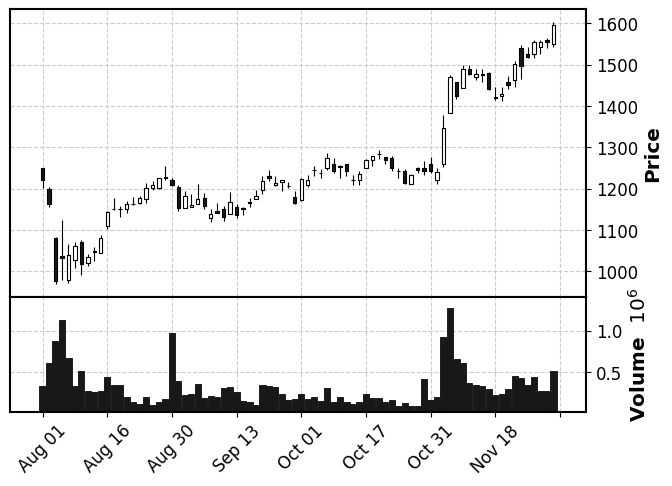

default


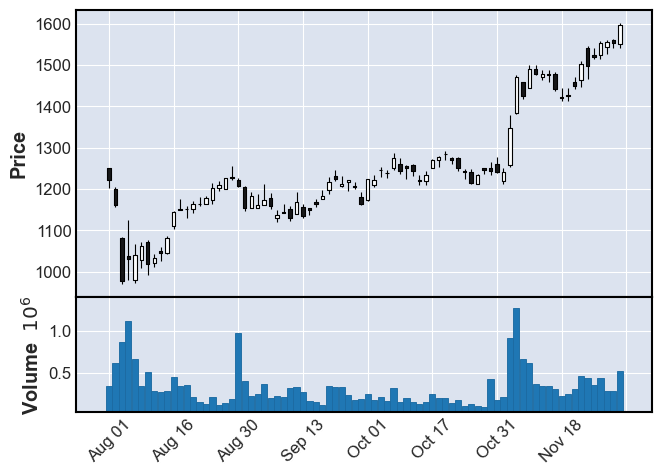

ibd


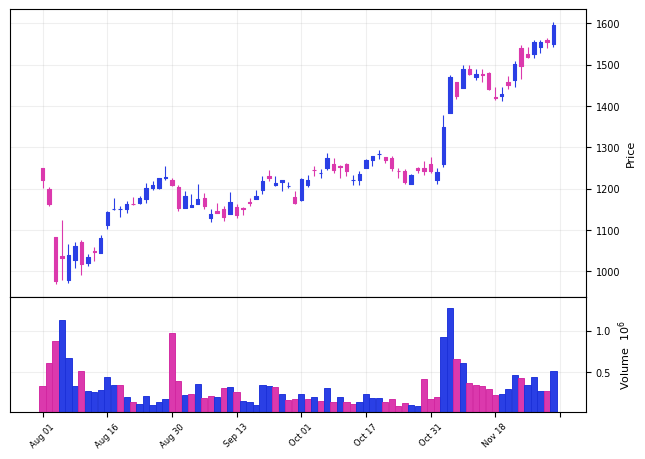

kenan


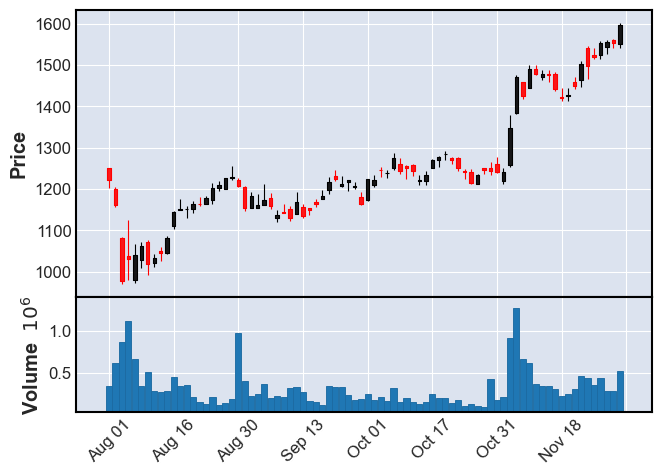

mike


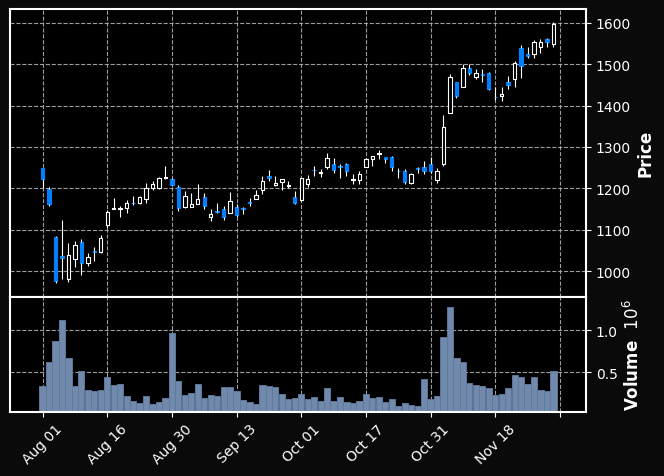

nightclouds


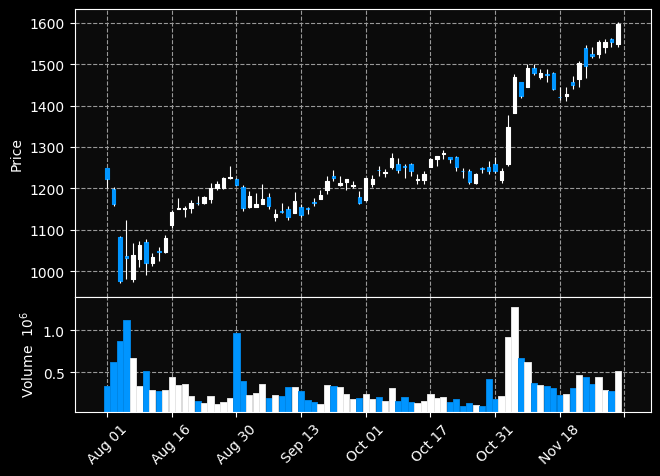

sas


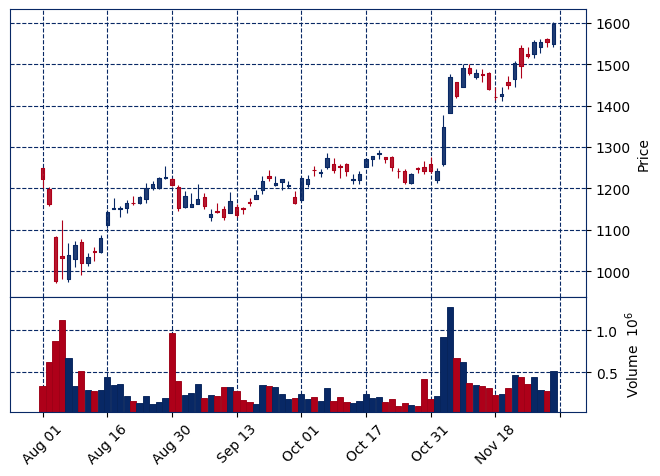

starsandstripes


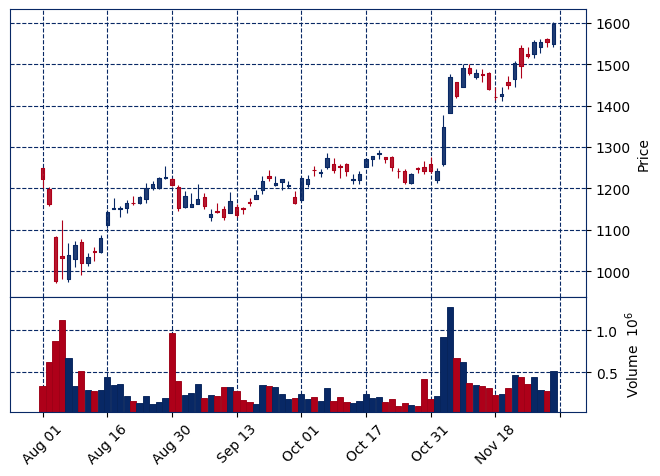

tradingview


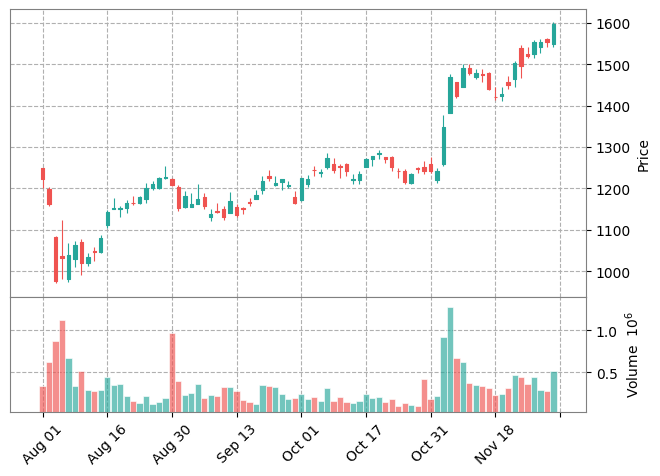

yahoo


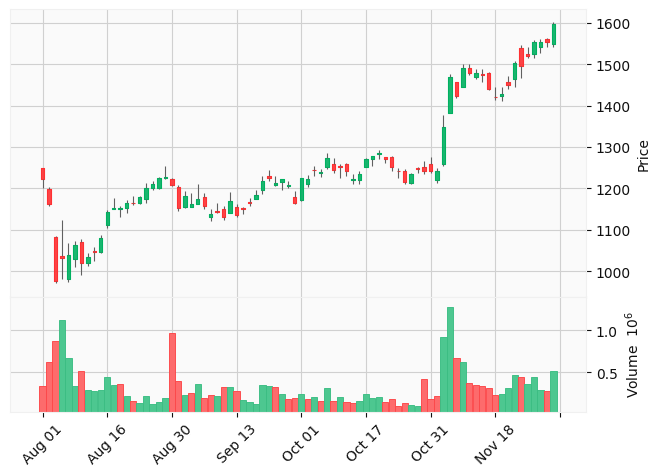

In [26]:
df_range = df[dt.date(2024, 8, 1):dt.date(2024, 11,30)]

for style in mpf.available_styles():
    print(style)
    mpf.plot(df_range, type="candle", volume=True, style=style)

### Resampling

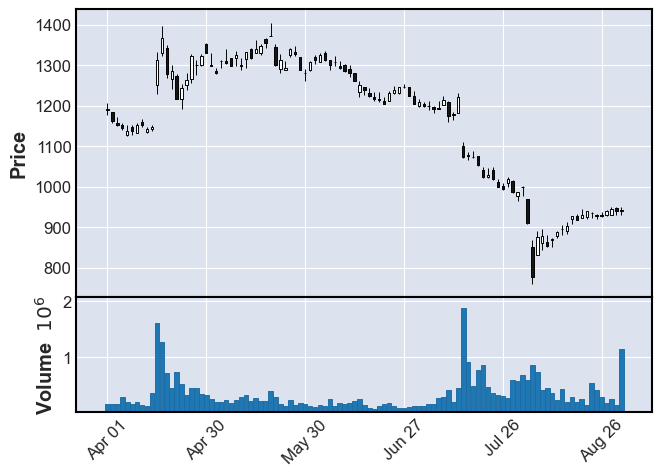

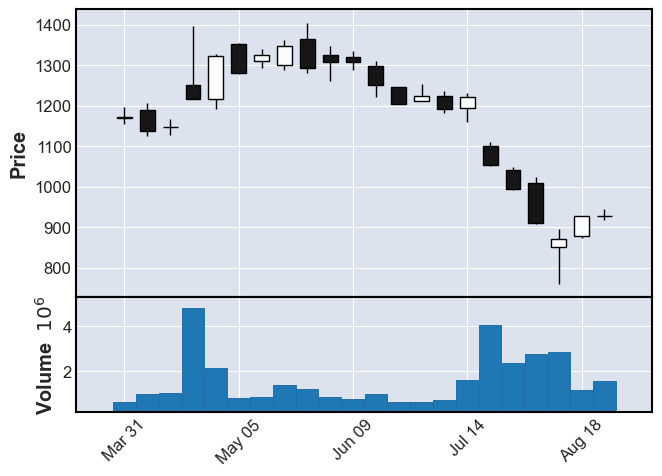

In [33]:
df = get_stock_data("6058.jp")
mpf.plot(df[dt.date(2024, 3, 31):dt.date(2024, 8, 30)], type="candle", volume=True)

resampled = df.resample('W')
weekly = resampled.aggregate({
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
})
mpf.plot(weekly[dt.date(2024, 3, 31):dt.date(2024, 8, 30)], type="candle", volume=True)